In [3]:
#
import matplotlib.font_manager as font_manager
import matplotlib as mpl

font_list = mpl.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
                                             

In [4]:
import pandas as pd
import seaborn as sns # 서브 패키지
import numpy as np
import matplotlib as mpl # 데이터 시각화
import matplotlib.pyplot as plt # 서브 패키지

In [5]:
survey_raw_df = pd.read_csv('data/survey_results_public.csv',index_col = 'ResponseId')

In [6]:
# schema 파일 불러오고 "qusetion" 부분만 가져오기
# schema_raw["survey_raw_df의 column"]을 조회하면 그 column에 대한 question에 대한 값이 조회되도록 만들려는 목적
schema_raw = pd.read_csv('data/survey_results_schema.csv',index_col = 'qname')["question"]

In [14]:
# CompTotal이란 항목에 대한 질문이 궁금하다면 조회
schema_raw["CompTotal"]

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [15]:
schema_raw["CompFreq"]

'Is that compensation weekly, monthly, or yearly?'

In [16]:
# survey_raw_df에 대한 info() 조회 총 78개의 column이 존재하는걸 확인
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      73268 non-null  object 
 1   Employment                      71709 non-null  object 
 2   RemoteWork                      58958 non-null  object 
 3   CodingActivities                58899 non-null  object 
 4   EdLevel                         71571 non-null  object 
 5   LearnCode                       71580 non-null  object 
 6   LearnCodeOnline                 50685 non-null  object 
 7   LearnCodeCoursesCert            29389 non-null  object 
 8   YearsCode                       71331 non-null  object 
 9   YearsCodePro                    51833 non-null  object 
 10  DevType                         61302 non-null  object 
 11  OrgSize                         51039 non-null  object 
 12  PurchaseInfluence               

In [17]:
# survey_raw_df에 대해 조회할 떄 생략되는 column이 없도록 설정
# -display.max_columns : 표현되는 column의 최대 개수
# -display.max_rows : 표현되는 row의 최대 개수

pd.set_option('display.max_columns',78)
pd.set_option('display.max_rows',78)

In [18]:
# 매우 많은 column 중 일부를 발췌하여 사용
#- 인구 통계(성별,나이,학력 등)
#- 프로그래밍 기술, 경험 및 선호도
#- 고용 관련 정보, 선호도 및 의견

selected_columns = [
    # 인구 통계
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    # 프로그래밍 경험
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    # 고용 관련 정보
    'Employment',
    'DevType',
    'WorkExp',
]

In [19]:
# 위에서 만든 리스트를 활용하여 column에 대해 배열 인덱싱
# 얻어진 결과를 survey_raw_df로 부터 분리하여 작업하고자 copy(0 메서드를 통해 새롭게 복사
survey_df = survey_raw_df[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Canada,NaN,NaN,NaN,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time",NaN,NaN
3,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,5,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,NaN,NaN,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,NaN
4,Israel,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, full-stack",NaN
5,United States of America,25-34 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,3,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,Nigeria,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,5,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,Udemy,DevOps function;Microservices;Developer portal...,Yes,"Employed, full-time","Developer, back-end",5.0
73265,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,5,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,Coursera;Udemy;Udacity,None of these,Not sure/can't remember,"Employed, full-time",Data scientist or machine learning specialist,6.0
73266,United States of America,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",42,33,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,Udemy;Codecademy;Pluralsight;edX,None of these,Yes,"Employed, full-time","Developer, full-stack;Developer, desktop or en...",42.0


In [20]:
# 새롭게 만든 survet_df에 대해 info()를 조회
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 71771 non-null  object 
 1   Age                     70946 non-null  object 
 2   Gender                  70853 non-null  object 
 3   EdLevel                 71571 non-null  object 
 4   YearsCode               71331 non-null  object 
 5   YearsCodePro            51833 non-null  object 
 6   LanguageHaveWorkedWith  70975 non-null  object 
 7   LanguageWantToWorkWith  67027 non-null  object 
 8   LearnCodeCoursesCert    29389 non-null  object 
 9   ProfessionalTech        34906 non-null  object 
 10  SOAccount               71572 non-null  object 
 11  Employment              71709 non-null  object 
 12  DevType                 61302 non-null  object 
 13  WorkExp                 36769 non-null  float64
dtypes: float64(1), object(13)
memory usage

In [21]:
# YearsCode 질문 내용 
print(schema_raw["YearsCode"])

Including any education, how many years have you been coding in total?


In [22]:
# value_counts() 활용하여 어던 값의 유형을 갖는지 확인
survey_df["YearsCode"].value_counts()

10                    5217
5                     5193
6                     4651
4                     4480
7                     4237
8                     4227
3                     4122
2                     3351
12                    2995
15                    2962
20                    2659
9                     2581
11                    1819
14                    1811
13                    1624
25                    1582
1                     1566
Less than 1 year      1413
16                    1406
30                    1330
22                    1176
18                    1150
17                    1080
40                     777
24                     752
35                     742
23                     644
19                     563
26                     489
27                     485
21                     483
28                     425
32                     371
38                     288
37                     277
34                     241
36                     236
3

In [23]:
# column(Series)이 NaN 값을 얼마나 갖는지 확인하기 위한 함수

def count_nan(series) :
    '''
    column(Series)이 NaN 값을 얼마나 갖는지 확인하기 위한 함수
    '''
    return len(series) - series.count()

def count_nan1(series) :
    '''
    column(Series)이 NaN 값을 얼마나 갖는지 확인하기 위한 함수
    '''
    return series.isnull().sum()

In [24]:
count_nan(survey_df["YearsCode"])

1937

In [25]:
# YearsCode의 'Less than 1 year' 의 값은 0으로 변경하고 'More than 50 years'의 값은 51로 일괄적으로 변경
# 또 dtype을 float로 변경하고 이를 survey_Df["YearsCode"]에 적용
# - 아래의 Series의 메서드를 활용
# - 힌트 : replace(변경 전 값, 변경 후 값, inplace = True)
a = pd.Series(survey_df["YearsCode"])
a.replace('Less than 1 year',0,inplace=True)
a.replace('More than 50 years',51,inplace=True)
survey_df["YearsCode"]=a.astype({'YearsCode':'float'})

In [26]:
survey_df["YearsCode"].dtypes

dtype('float64')

In [27]:
# YearsCodePro의 'Less than 1 year' 의 값은 0으로 변경하고 'More than 50 years'의 값은 51로 일괄적으로 변경
# 또 dtype을 float로 변경하고 이를 survey_Df["YearsCode"]에 적용
# - 아래의 Series의 메서드를 활용
# - 힌트 : replace(변경 전 값, 변경 후 값, inplace = True)

b = pd.Series(survey_df["YearsCodePro"])
b.replace('Less than 1 year',0,inplace=True)
b.replace('More than 50 years',51,inplace=True)
survey_df["YearsCodePro"]=b.astype({'YearsCodePro':'float'})

In [28]:
survey_df["YearsCodePro"].dtypes

dtype('float64')

In [29]:
survey_df.describe()

,YearsCode,YearsCodePro,WorkExp
count,71331.000000,51833.000000,36769.000000
mean,12.251307,9.910270,10.242378
std,9.952419,8.712048,8.706850
min,0.000000,0.000000,0.000000
25%,5.000000,4.000000,4.000000
50%,9.000000,7.000000,8.000000
75%,16.000000,14.000000,15.000000
max,51.000000,51.000000,50.000000


In [30]:
# 'less than 1 year', 'More than 50 years' 의 값을 NaN으로 처리하면서 수치 자료형으로 바꾼다면 to_numeric()메서드 활용

survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro,errors='coerce')

In [31]:
schema_raw["Gender"]

'Which of the following describe you, if any? Please check all that apply.'

In [32]:
# 성별의 개수
# 둘 이상의 옵션이 포함된 값을 배제
survey_df["Gender"].value_counts()

Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

In [33]:
# np.nan 값이 섞인 Series 자료형에 대해 특정 문자 값이 포함되었는지 사용할 수 있는 메서드로 contains()가 있음.
# 첫 인자로 포함된 것을 찾을 문자열을 넣어준다.
# na 키워드 인수를 활용하면 NaN 값을 대신할 값을 넣을 수 있습니다.
# 앞의 두 메서드를 활용하면 ';'를 포함하는 row를 NaN 값으로 변경할 수있음
# '~'은 비트 연산자로 Series 자료형의 벡터화 연산을 위해 True를 False로 False는 True로 반전해주는 역할

survey_df.where(~(survey_df["Gender"].str.contains(";",na=False)),np.nan,inplace=True)

In [34]:
survey_df["Gender"].value_counts() # 변환을 마치면 성별로 1개의 값만 선택한 선택지만 남은 것을 확인 할 수 있음

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

In [35]:
#데이터 시각화

%matplotlib inline #매직 명령어를 통해서 주피터 내에 그래프가 잘 출력되도록 설정

UsageError: unrecognized arguments: #매직 명령어를 통해서 주피터 내에 그래프가 잘 출력되도록 설정


In [36]:
sns.set_style('darkgrid')
mpl.rcParams['font.size']= 14 # 기본 폰트의 크기 적용
mpl.rcParams['figure.figsize']=(9,5) # 사이즈 적용
mpl.rcParams['figure.facecolor'] = '#00000000' #기본배경을 흰색으로 적용

In [37]:
#폰트조회
import matplotlib.font_manager as font_manager
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['C:/python/fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)

Nanum Pen


In [38]:
#폰트 적용
# Set font family globally
mpl.rcParams['font.family'] = 'Nanum Pen'
print(mpl.rcParams['font.family'])

['Nanum Pen']


In [39]:
# 한글 표시를 위해 폰트 지정 필수
# 기본 폰트 적용은 rcParams 설정으로
# - font.family : 기본 폰트 종류 적용
# - axes.unicode_minus : False로 설정 시 마이너스 기호로 ASCII로 한다.

mpl.rcParams["font.family"] = 'Nanum Pen'
mpl.rcParams["axes.unicode_minus"]=False

In [40]:
# 거주하는 국가가 무엇인지 분포를 파악

schema_raw['Country'] #문제

survey_df["Country"].unique()

array([nan, 'Canada',
       'United Kingdom of Great Britain and Northern Ireland', 'Israel',
       'United States of America', 'Germany', 'India', 'Netherlands',
       'Croatia', 'Australia', 'Russian Federation', 'Czech Republic',
       'Austria', 'Serbia', 'Italy', 'Ireland', 'Poland', 'Slovenia',
       'Iraq', 'Sweden', 'Madagascar', 'Norway', 'Taiwan',
       'Hong Kong (S.A.R.)', 'Mexico', 'France', 'Brazil', 'Lithuania',
       'Uruguay', 'Denmark', 'Spain', 'Egypt', 'Turkey', 'South Africa',
       'Ukraine', 'Finland', 'Romania', 'Portugal', 'Singapore', 'Oman',
       'Belgium', 'Chile', 'Bulgaria', 'Latvia', 'Philippines', 'Greece',
       'Belarus', 'Saudi Arabia', 'Kenya', 'Switzerland', 'Iceland',
       'Viet Nam', 'Thailand', 'China', 'Montenegro', 'Slovakia', 'Japan',
       'Luxembourg', 'Turkmenistan', 'Argentina', 'Hungary', 'Tunisia',
       'Bangladesh', 'Maldives', 'Dominican Republic', 'Jordan',
       'Pakistan', 'Nepal', 'Iran, Islamic Republic of...', 'I

In [41]:
# NaN 값은 count에 포함되지 않는값
survey_df["Country"].nunique()

180

In [42]:
# 설문 응답자가 속한 국가 중 응답자 수 상위 15개 국가를 구연
survey_df["Country"].value_counts()[0:15]

United States of America                                13321
India                                                    6618
Germany                                                  5342
United Kingdom of Great Britain and Northern Ireland     4132
Canada                                                   2459
France                                                   2306
Brazil                                                   2088
Poland                                                   1719
Netherlands                                              1539
Spain                                                    1511
Italy                                                    1504
Australia                                                1449
Russian Federation                                       1215
Turkey                                                   1014
Sweden                                                   1008
Name: Country, dtype: int64

In [43]:
top_countries = survey_df["Country"].value_counts().head(15)
top_countries

United States of America                                13321
India                                                    6618
Germany                                                  5342
United Kingdom of Great Britain and Northern Ireland     4132
Canada                                                   2459
France                                                   2306
Brazil                                                   2088
Poland                                                   1719
Netherlands                                              1539
Spain                                                    1511
Italy                                                    1504
Australia                                                1449
Russian Federation                                       1215
Turkey                                                   1014
Sweden                                                   1008
Name: Country, dtype: int64

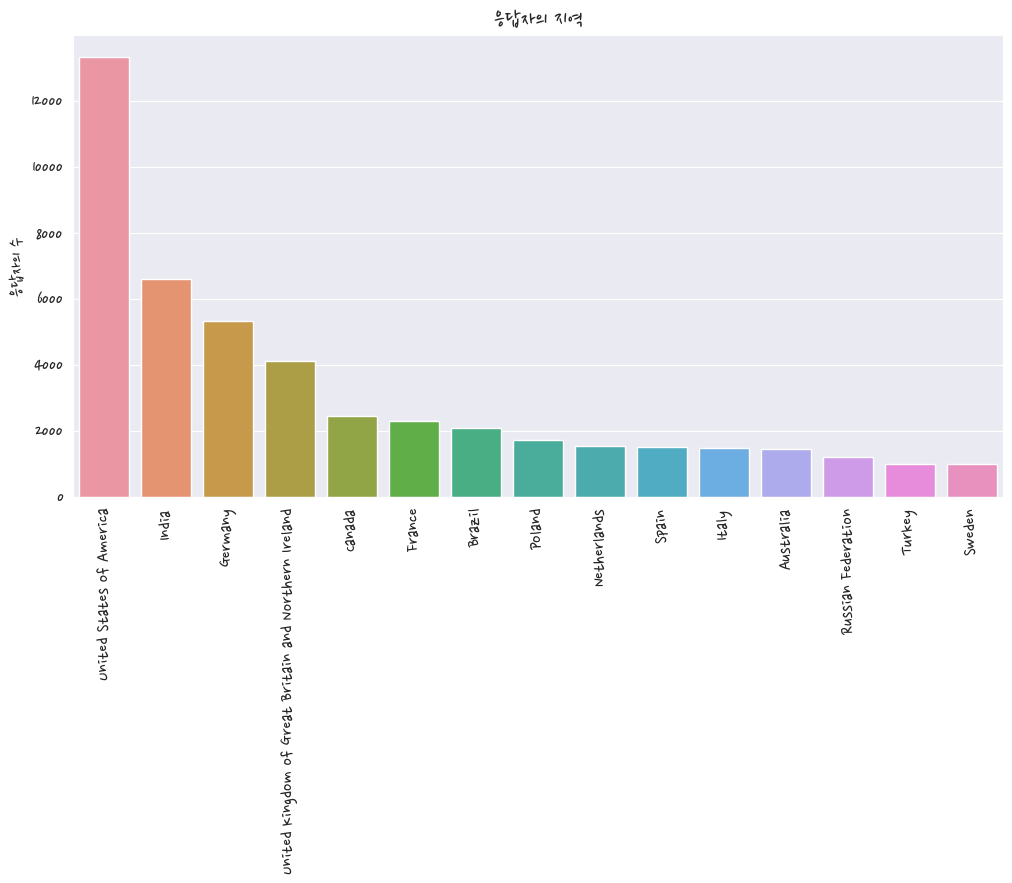

In [44]:
# xticks차트 rotation = 90 (각도를 의미하는 정수)


plt.figure(figsize=(12,6))
plt.title("응답자의 지역")
plt.xticks(rotation=90)
sns.barplot(x=top_countries.index , y=top_countries)
plt.ylabel('응답자의 수')
    
plt.show()

In [45]:
# 연령에 대한 데이터의 특징
schema_raw["Age"]

'What is your age?'

In [46]:
count_nan(survey_df['Age'])

3011

In [47]:
age_counts = survey_df['Age'].value_counts()
age_counts
#이미 범주화라는 걸 확인

25-34 years old       27878
18-24 years old       16455
35-44 years old       13866
45-54 years old        5250
Under 18 years old     3775
55-64 years old        1974
65 years or older       547
Prefer not to say       512
Name: Age, dtype: int64

In [48]:
survey_df["Age"].unique()

array([nan, '25-34 years old', '35-44 years old', 'Under 18 years old',
       '18-24 years old', '45-54 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [49]:
survey_df["Age"].nunique()

8

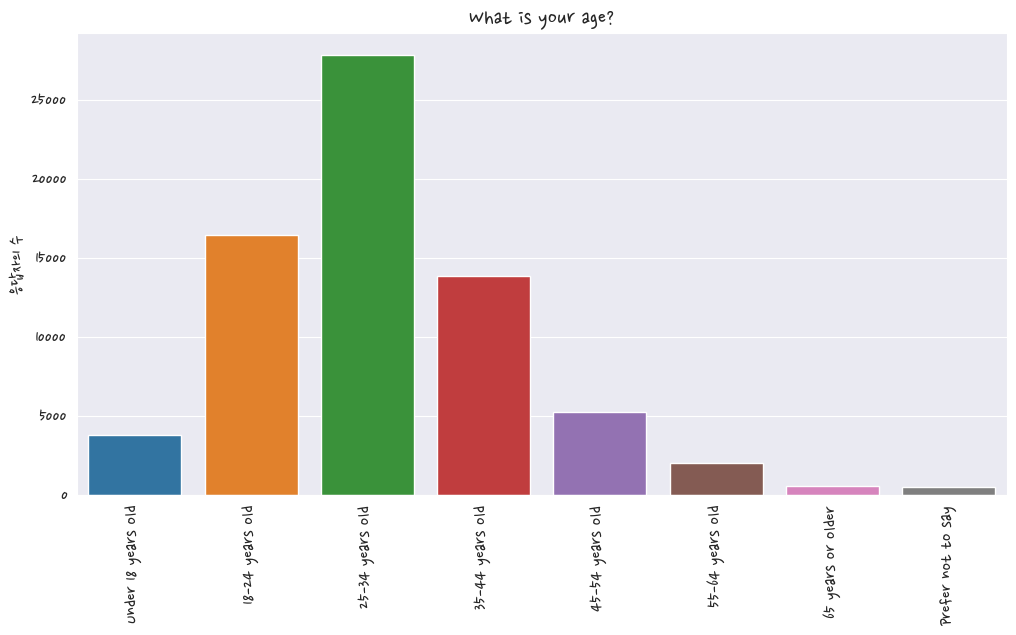

In [50]:
# 연령의 분포가 눈에 들어오게
top_age = survey_df["Age"].value_counts()
top_age

plt.figure(figsize=(12,6))
plt.title("What is your age?")
plt.xticks(rotation=90)
sns.barplot(x=top_age.index , y=top_age, order = ['Under 18 years old','18-24 years old','25-34 years old','35-44 years old',
                                                                    '45-54 years old','55-64 years old','65 years or older','Prefer not to say'])

plt.ylabel('응답자의 수')
    
plt.show()

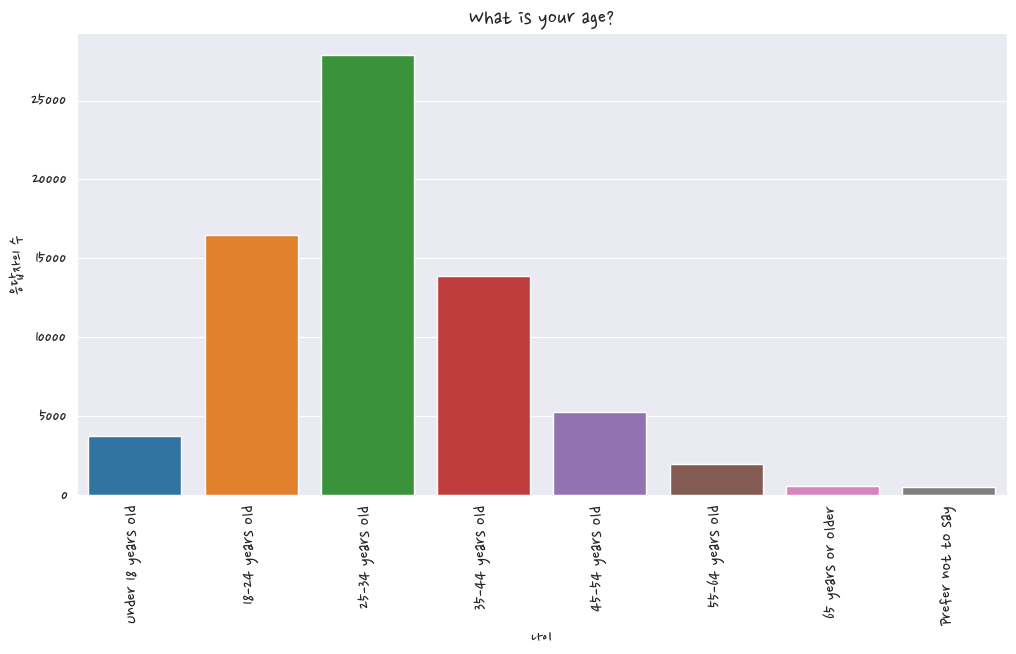

In [51]:
age_order = ['Under 18 years old',
            '18-24 years old',
            '25-34 years old',
            '35-44 years old',
            '45-54 years old',
            '55-64 years old',
            '65 years or older',
            'Prefer not to say']

plt.figure(figsize=(12,6))
plt.title(schema_raw["Age"])
plt.xticks(rotation=90)
sns.countplot(data=survey_df, x="Age", order=age_order)
plt.xlabel("나이")
plt.ylabel("응답자의 수")
plt.show()

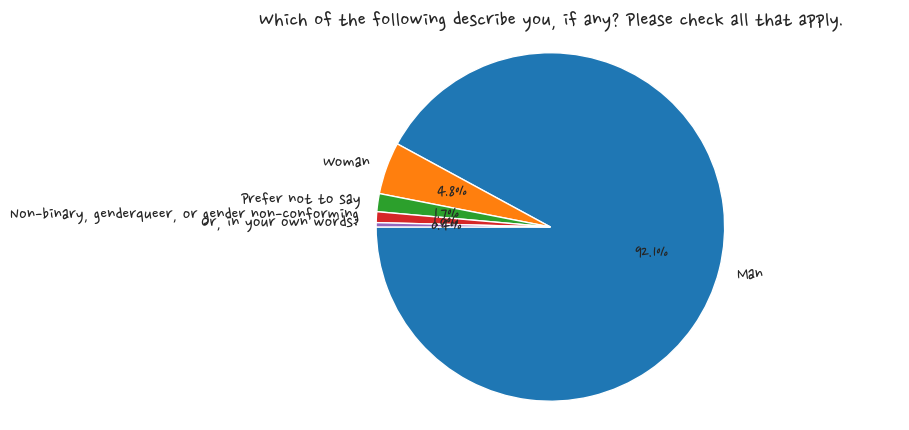

In [52]:
gender = survey_df["Gender"].value_counts()


labels = gender.index
sizes = gender
plt.title("Which of the following describe you, if any? Please check all that apply.")
plt.style.use('seaborn-bright')
plt.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=180) #autopct 값표시"
plt.axis('equal') #원의 형태를 유치
plt.show()

In [53]:
# matplotlib에서 적용할 수 있는 style 목록 조회
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


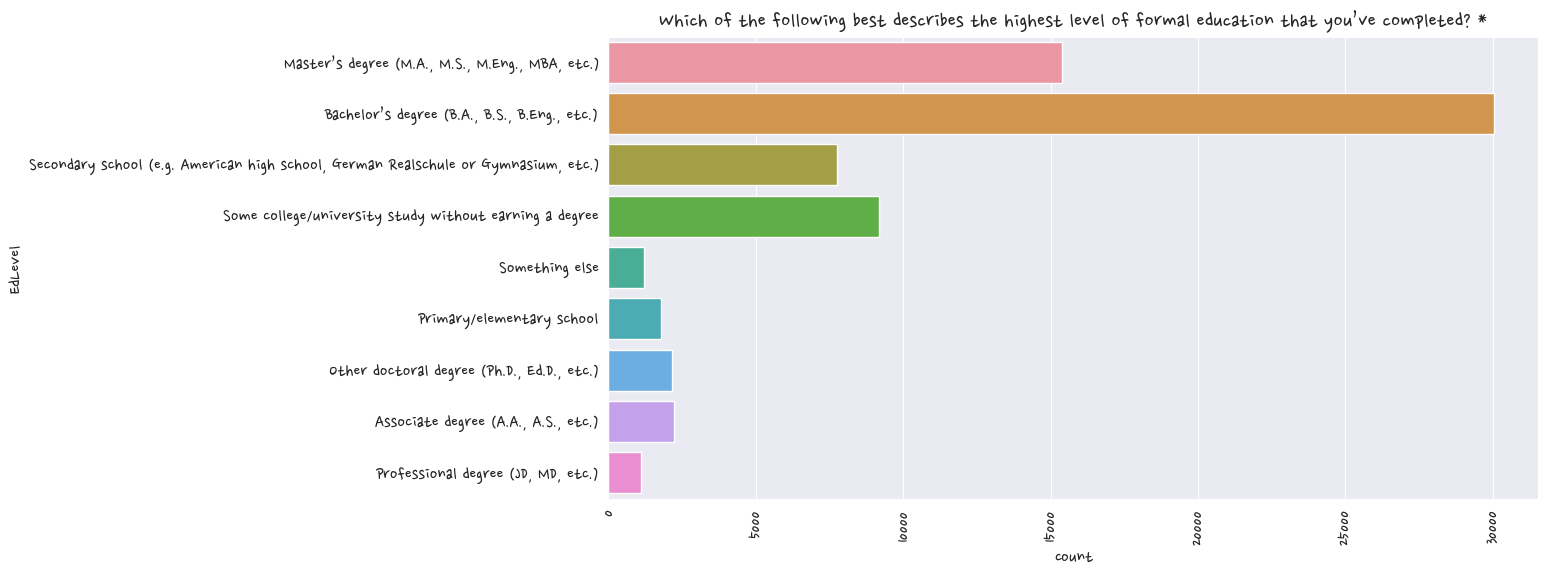

In [54]:

plt.figure(figsize=(12,6))
plt.title(schema_raw["EdLevel"])
plt.xticks(rotation=90)
sns.countplot(data=survey_df, y="EdLevel")
plt.xlabel("count")

plt.show()

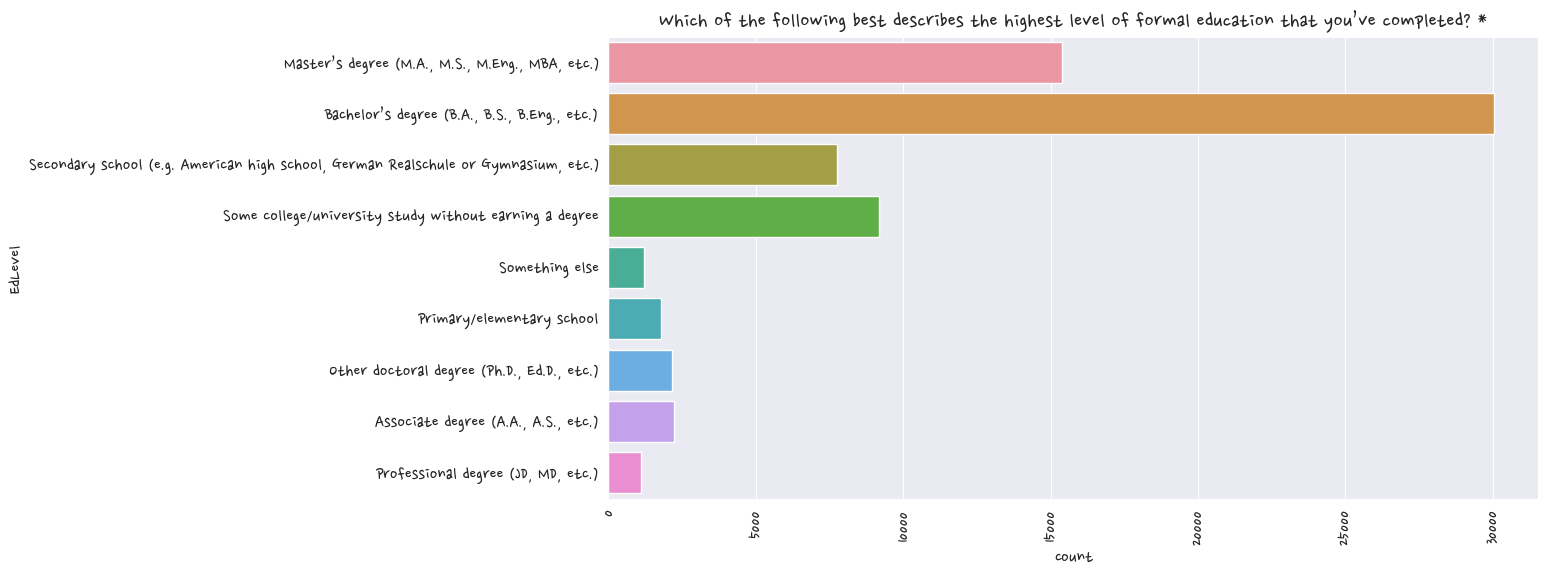

In [55]:
plt.figure(figsize=(12,6))
plt.title(schema_raw["EdLevel"])
plt.xticks(rotation=90)
sns.countplot(data=survey_df, y="EdLevel")
plt.xlabel("count")

plt.show()

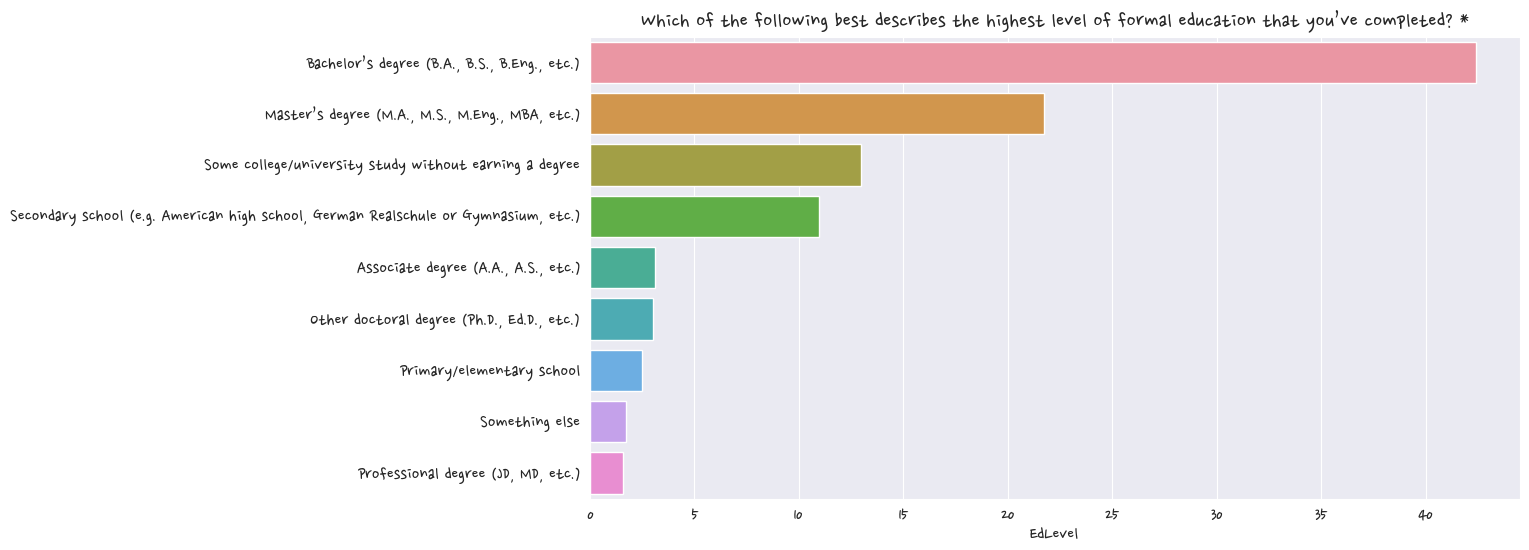

In [56]:
# x축의 단위가 퍼센트로 변경

edlevel = survey_df["EdLevel"].value_counts()

total = (edlevel / edlevel.sum())*100 ## 단위 퍼센트 전체 갯수에서 더한값 나누기 총 합이 1이되어야함
total

plt.figure(figsize=(12,6))
plt.title(schema_raw["EdLevel"])
sns.barplot(x=total, y=edlevel.index)

    
plt.show()

In [57]:
EdLevel_pct = survey_df.EdLevel.value_counts(True) * 100
EdLevel_pct

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          42.396196
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       21.718704
Some college/university study without earning a degree                                12.971402
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    10.960933
Associate degree (A.A., A.S., etc.)                                                    3.133509
Other doctoral degree (Ph.D., Ed.D., etc.)                                             3.036160
Primary/elementary school                                                              2.492981
Something else                                                                         1.724065
Professional degree (JD, MD, etc.)                                                     1.566049
Name: EdLevel, dtype: float64

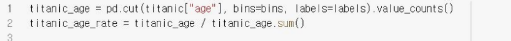

Text(0, 0.5, '')

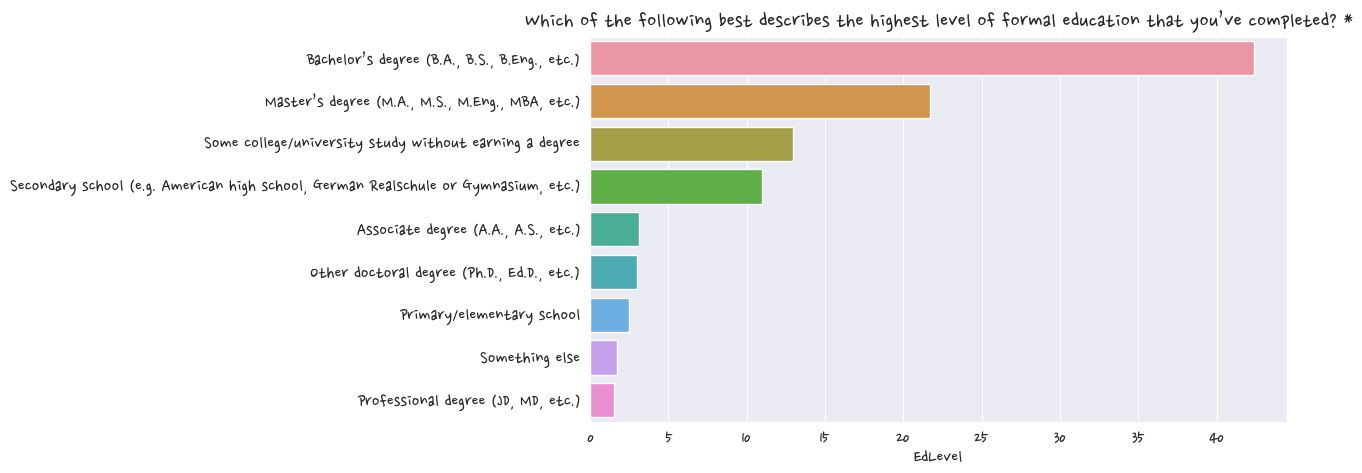

In [58]:
sns.barplot(x=EdLevel_pct,y=EdLevel_pct.index)
plt.title(schema_raw["EdLevel"])
plt.ylabel(None)

In [59]:
top_employment = survey_df["Employment"].value_counts().head(15)
top_employment

Employed, full-time                                                         42644
Student, full-time                                                           6663
Independent contractor, freelancer, or self-employed                         4941
Employed, full-time;Independent contractor, freelancer, or self-employed     3456
Not employed, but looking for work                                           1810
Student, full-time;Employed, part-time                                       1148
Employed, part-time                                                          1116
Student, part-time                                                           1036
Employed, full-time;Student, full-time                                        961
Employed, full-time;Student, part-time                                        932
Student, part-time;Employed, part-time                                        717
Student, full-time;Not employed, but looking for work                         715
Not employed, an

Text(0.5, 0, 'Percentange')

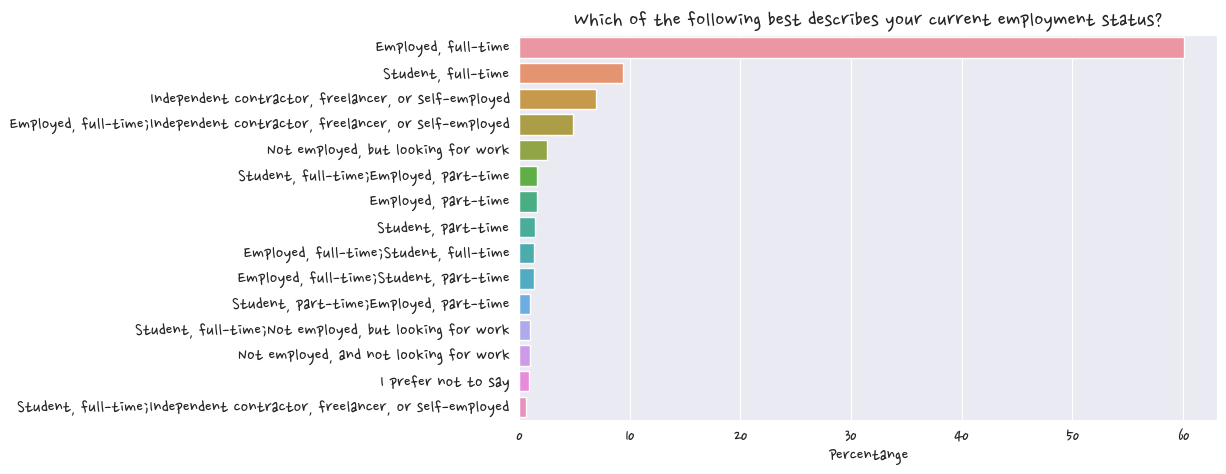

In [62]:
employmnet = (survey_df.Employment.value_counts(True, ascending=False) * 100). head(15)
sns.barplot(x=employmnet, y=employmnet.index)
plt.title(schema_raw.Employment)
plt.xlabel('Percentange')

In [63]:
# 약 10,000개의 가지수 조회 어떻게 처리?
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                                                  7091
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                                                    5274
Developer, front-end                                                                                                                            

문제 : DevType column을 제일 작은 단위의 응답 항목으로 나누어 DataFrame 형태로 만들기
- Series를 인자로 받아오기
- value의 구분자는 ';'
- Series는 items() 메서드를 사용하여 루프할 수 있음
- 반환 값으로 각 제일 작은 단위의 응답 항목을 column으로 갖는 DataFrame을 줌
- 응답자가 제일 작은 단위의 기술 스텍을 선택할 경우 해당 열의 값을 True로 아닌 경우 False로 한다.

In [222]:
devtype = survey_df["DevType"].unique()
devtype
devtype1 = pd.Series(devtype)
devtype1 
devtype2 = devtype1.str.split(";").fillna("False")
devtype2
c = devtype2.items()
for devtype in devtype2.items() :
    print(devtype)

devtype
devtype = survey_df["DevType"].str.split(";")
devtype =  pd.Series(devtype)
c = devtype.items()

In [235]:
devtype = pd.DataFrame(survey_df["DevType"].unique())

In [240]:
def split_multicolumn(col_series):
    # 반환할 DataFrame이자 최초의 col_series도 담는다.
    result_df = pd.DataFrame(col_series.values, index=col_series.index, columns=["DevType"])
    # result_df = col_series.to_frame() --> 위의 코드와 같다.
    # 기술 스텍 목록을 담았다가 마지막 반환할 때 인덱싱으로 활용
    options = []
    # NaN 값을 갖는 row를 제외하고 반복
    for idx, value  in col_series[col_series.notnull()].items():
        # value를 가져와 ';'를 기준으로 분리하여 각 기술 스텍 문자열 리스트를 만든다.
        for option in value.split(';'):
            # 현재 option이 result_df.columns에 없으면 추가한다.
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False
            # 파싱한 기술 스텍에 해당하는 column의 값에 True를 넣는다.
            result_df.at[idx, option] = True
            # result_df.loc[idx, option] = True
    return result_df[options]
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html
split_multicolumn(survey_df['DevType'])

,Data scientist or machine learning specialist,"Developer, front-end","Engineer, data","Engineer, site reliability","Developer, full-stack","Developer, back-end","Developer, desktop or enterprise applications","Developer, QA or test",Student,"Developer, mobile",Educator,Engineering manager,Database administrator,Academic researcher,DevOps specialist,Other (please specify):,"Developer, embedded applications or devices","Developer, game or graphics",Project manager,Cloud infrastructure engineer,Data or business analyst,Designer,Scientist,Product manager,"Senior Executive (C-Suite, VP, etc.)",System administrator,Blockchain,Marketing or sales professional,Security professional
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [239]:
def split_multicolumn(Series):
    df = pd.DataFrame(False, columns = (Series.dropna().str.split(';').str[0].unique()), index = Series.index)
    # for idx, rep in Series[Series.notnull()].str.split(';').items:
    #     for one in rep:
    #         df.at[idx, one.strip()] = True
    for idx, rep in Series.str.split(';').items():
        # NaN이 아닌 값을 분기
        if isinstance(rep, list):
            for one in rep:
                df.at[idx, one.strip()] = True
        else :
            pass
    return df
split_multicolumn(survey_df['DevType'])

,Data scientist or machine learning specialist,"Developer, full-stack","Developer, front-end","Developer, back-end","Developer, desktop or enterprise applications",Engineering manager,"Engineer, data",Student,Other (please specify):,"Engineer, site reliability","Developer, mobile",Marketing or sales professional,"Developer, embedded applications or devices",DevOps specialist,Designer,Database administrator,System administrator,"Developer, QA or test",Product manager,Project manager,Data or business analyst,"Senior Executive (C-Suite, VP, etc.)",Security professional,Educator,Academic researcher,"Developer, game or graphics",Cloud infrastructure engineer,Scientist,Blockchain
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [248]:
# 데이터가 적을떄
temp = []
for _,value in survey_df["DevType"].dropna().items():
    temp.extend(value.split(';'))
    
result = []
for _ in temp:
    if _ not in result:
        result.append(_)
result

['Data scientist or machine learning specialist',
 'Developer, front-end',
 'Engineer, data',
 'Engineer, site reliability',
 'Developer, full-stack',
 'Developer, back-end',
 'Developer, desktop or enterprise applications',
 'Developer, QA or test',
 'Student',
 'Developer, mobile',
 'Educator',
 'Engineering manager',
 'Database administrator',
 'Academic researcher',
 'DevOps specialist',
 'Other (please specify):',
 'Developer, embedded applications or devices',
 'Developer, game or graphics',
 'Project manager',
 'Cloud infrastructure engineer',
 'Data or business analyst',
 'Designer',
 'Scientist',
 'Product manager',
 'Senior Executive (C-Suite, VP, etc.)',
 'System administrator',
 'Blockchain',
 'Marketing or sales professional',
 'Security professional']

In [246]:
result = list(set(temp))
result

['Scientist',
 'Developer, desktop or enterprise applications',
 'Developer, full-stack',
 'Marketing or sales professional',
 'Other (please specify):',
 'Developer, back-end',
 'Cloud infrastructure engineer',
 'Developer, game or graphics',
 'System administrator',
 'Developer, QA or test',
 'Database administrator',
 'Project manager',
 'Data or business analyst',
 'Developer, embedded applications or devices',
 'Student',
 'Engineer, site reliability',
 'Engineer, data',
 'Blockchain',
 'Developer, mobile',
 'Educator',
 'Academic researcher',
 'Product manager',
 'DevOps specialist',
 'Data scientist or machine learning specialist',
 'Security professional',
 'Developer, front-end',
 'Designer',
 'Engineering manager',
 'Senior Executive (C-Suite, VP, etc.)']

In [299]:
a = split_multicolumn(survey_df['DevType'])

In [259]:
devtype.sum()

Data scientist or machine learning specialist     3377
Developer, front-end                             15739
Engineer, data                                    3558
Engineer, site reliability                        1903
Developer, full-stack                            28433
Developer, back-end                              26369
Developer, desktop or enterprise applications     9451
Developer, QA or test                             3045
Student                                           5503
Developer, mobile                                 7566
Educator                                          2047
Engineering manager                               3534
Database administrator                            4872
Academic researcher                               2664
DevOps specialist                                 6093
Other (please specify):                           2580
Developer, embedded applications or devices       3871
Developer, game or graphics                       1790
Project ma

In [290]:
dev_type_totals = a.sum().sort_values(ascending=False)
dev_type_totals

Developer, full-stack                            28433
Developer, back-end                              26369
Developer, front-end                             15739
Developer, desktop or enterprise applications     9451
Developer, mobile                                 7566
DevOps specialist                                 6093
Student                                           5503
Cloud infrastructure engineer                     5215
Database administrator                            4872
System administrator                              4828
Developer, embedded applications or devices       3871
Project manager                                   3844
Designer                                          3712
Engineer, data                                    3558
Engineering manager                               3534
Data scientist or machine learning specialist     3377
Data or business analyst                          3166
Developer, QA or test                             3045
Academic r

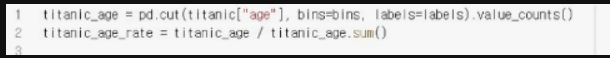

In [307]:
devtype_percentage = dev_type_totals = dev_type_totals / dev_type_totals.sum() *100

In [311]:
devtype_percentage

Developer, full-stack                            17.462842
Developer, back-end                              16.195185
Developer, front-end                              9.666503
Developer, desktop or enterprise applications     5.804569
Developer, mobile                                 4.646849
DevOps specialist                                 3.742169
Student                                           3.379806
Cloud infrastructure engineer                     3.202923
Database administrator                            2.992261
System administrator                              2.965238
Developer, embedded applications or devices       2.377472
Project manager                                   2.360889
Designer                                          2.279818
Engineer, data                                    2.185235
Engineering manager                               2.170495
Data scientist or machine learning specialist     2.074070
Data or business analyst                          1.9444

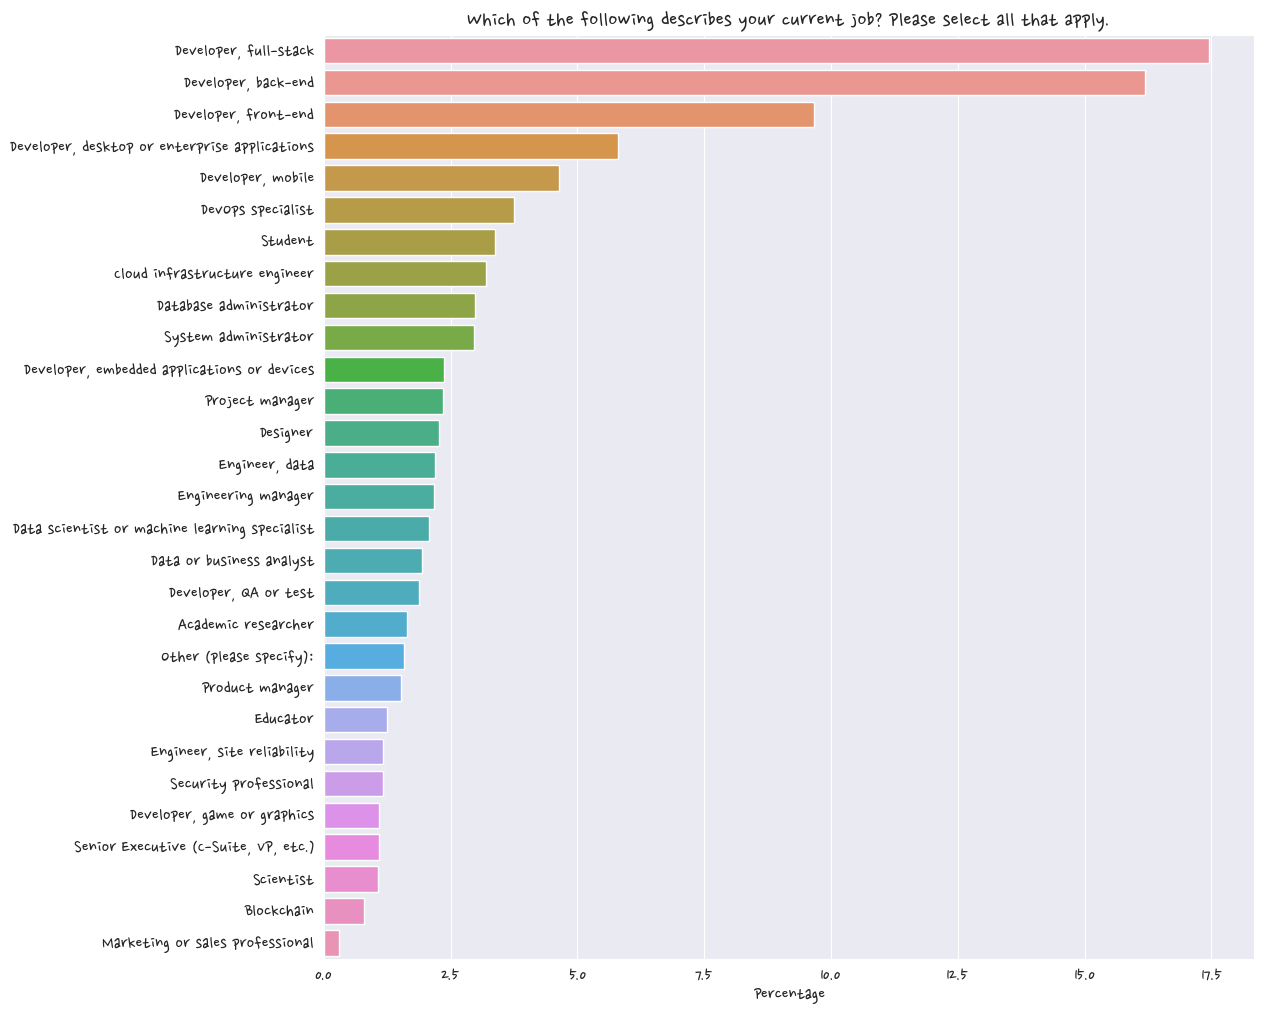

In [312]:
plt.figure(figsize=(12,12))
plt.title(schema_raw["DevType"])
sns.barplot(x=devtype_percentage, y=devtype_percentage.index)
plt.xlabel('Percentage')
    
plt.show()

In [318]:
b = split_multicolumn(survey_df['LanguageHaveWorkedWith'])
b

,JavaScript,TypeScript,C#,C++,HTML/CSS,Python,SQL,Swift,Lua,PHP,C,Java,Delphi,Bash/Shell,PowerShell,Rust,Elixir,Erlang,Ruby,R,Scala,VBA,Dart,Go,Kotlin,Groovy,MATLAB,Perl,Haskell,Julia,LISP,Assembly,F#,Clojure,APL,Crystal,Fortran,Objective-C,SAS,OCaml,Solidity,COBOL
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,True,True,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,True,True,False,False,False,True,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,True,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,True,False,False,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [320]:
Language_type_totals = b.sum().sort_values(ascending=False)
Language_type_totals

JavaScript     45969
HTML/CSS       38714
SQL            34782
Python         33772
TypeScript     24470
Java           23395
Bash/Shell     20357
C#             19672
C++            15839
PHP            14660
C              13506
PowerShell      8469
Go              7823
Rust            6483
Kotlin          6416
Dart            4592
Ruby            4226
Assembly        3796
Swift           3444
R               3261
VBA             3147
MATLAB          2869
Lua             2802
Groovy          2322
Delphi          2287
Scala           1799
Objective-C     1668
Perl            1611
Haskell         1531
Elixir          1497
Julia           1059
Clojure         1042
Solidity        1008
LISP             899
F#               713
Fortran          631
Erlang           619
APL              475
COBOL            445
SAS              417
OCaml            402
Crystal          324
dtype: int64

In [321]:
Language_type = Language_type_totals = Language_type_totals / Language_type_totals.sum() *100
Language_type

JavaScript     12.656210
HTML/CSS       10.658759
SQL             9.576199
Python          9.298125
TypeScript      6.737094
Java            6.441124
Bash/Shell      5.604700
C#              5.416106
C++             4.360802
PHP             4.036199
C               3.718479
PowerShell      2.331690
Go              2.153833
Rust            1.784903
Kotlin          1.766457
Dart            1.264272
Ruby            1.163505
Assembly        1.045117
Swift           0.948204
R               0.897820
VBA             0.866434
MATLAB          0.789895
Lua             0.771448
Groovy          0.639294
Delphi          0.629658
Scala           0.495302
Objective-C     0.459235
Perl            0.443541
Haskell         0.421516
Elixir          0.412155
Julia           0.291564
Clojure         0.286884
Solidity        0.277523
LISP            0.247513
F#              0.196304
Fortran         0.173727
Erlang          0.170423
APL             0.130777
COBOL           0.122518
SAS             0.114809


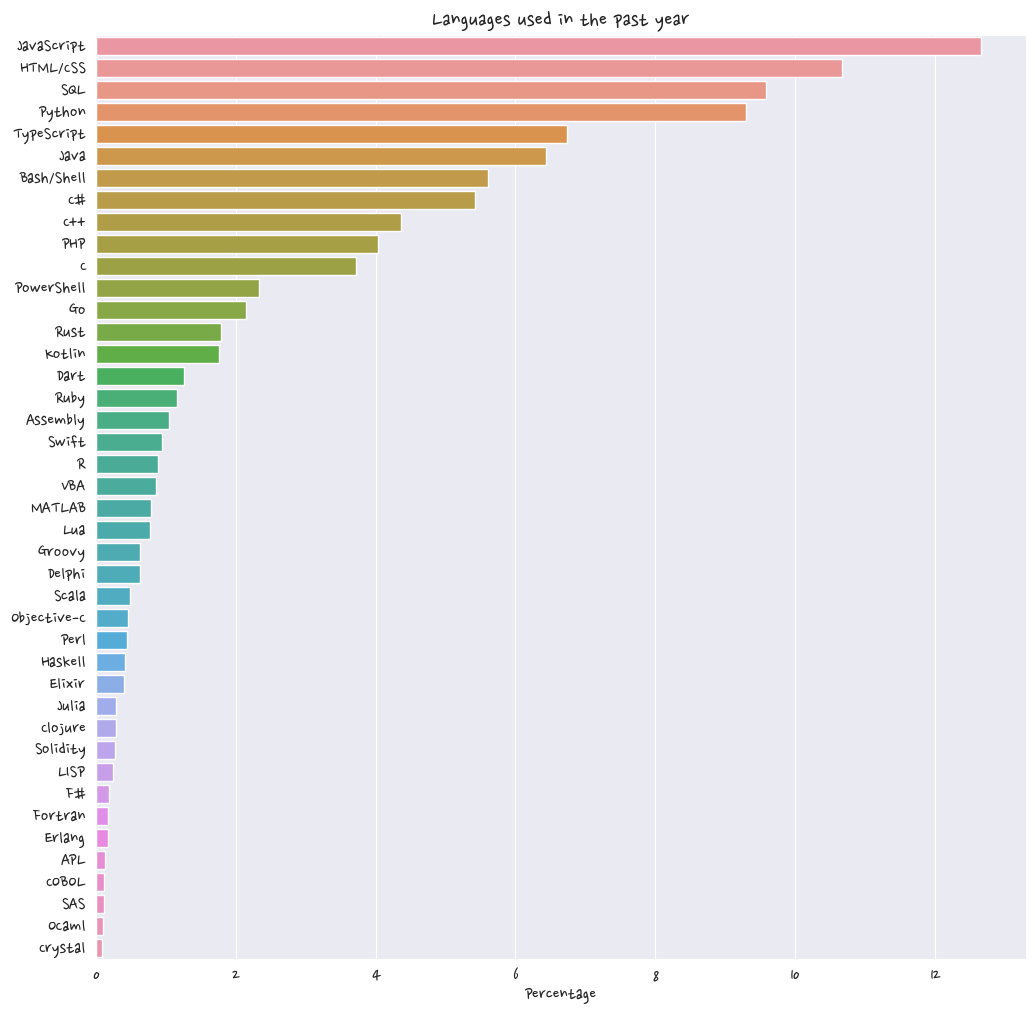

In [325]:
# 2022년 가장 인기 있는 프로그래밍 언어
b = split_multicolumn(survey_df['LanguageHaveWorkedWith'])

Language_type_totals = b.sum().sort_values(ascending=False)

Language_type = Language_type_totals = Language_type_totals / Language_type_totals.sum() *100

plt.figure(figsize=(12,12))
plt.title("Languages used in the past year")
sns.barplot(x=Language_type, y=Language_type.index)
plt.xlabel('Percentage')
    
plt.show()

In [ ]:
# 한국인 응답자의 기술 스텍의 분포
b = split_multicolumn(survey_df['LanguageHaveWorkedWith'])

Language_type_totals = b.sum().sort_values(ascending=False)

Language_type = Language_type_totals = Language_type_totals / Language_type_totals.sum() *100

plt.figure(figsize=(12,12))
plt.title("Languages used in the past year")
sns.barplot(x=Language_type, y=Language_type.index)
plt.xlabel('Percentage')
    
plt.show()

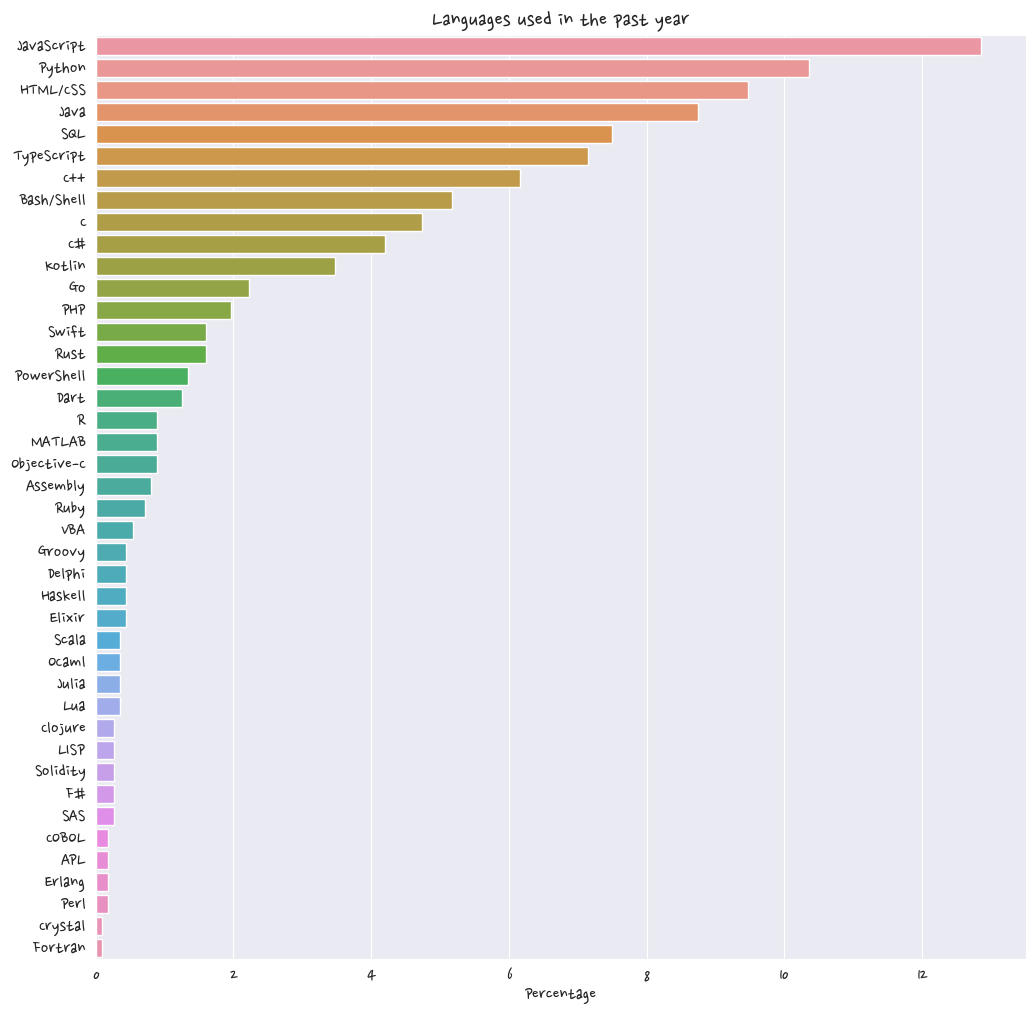

In [358]:
home_country = survey_df[survey_df.Country =='South Korea']
home_country

home_languages_worked_df = split_multicolumn(home_country['LanguageHaveWorkedWith'])

home_languages_worked_totals = home_languages_worked_df.sum().sort_values(ascending=False)

home_languages_worked_percentages = home_languages_worked_totals /  home_languages_worked_totals.sum() *100

plt.figure(figsize=(12,12))
plt.title("Languages used in the past year")
sns.barplot(x=home_languages_worked_percentages, y=home_languages_worked_percentages.index)
plt.xlabel('Percentage')
    
plt.show()

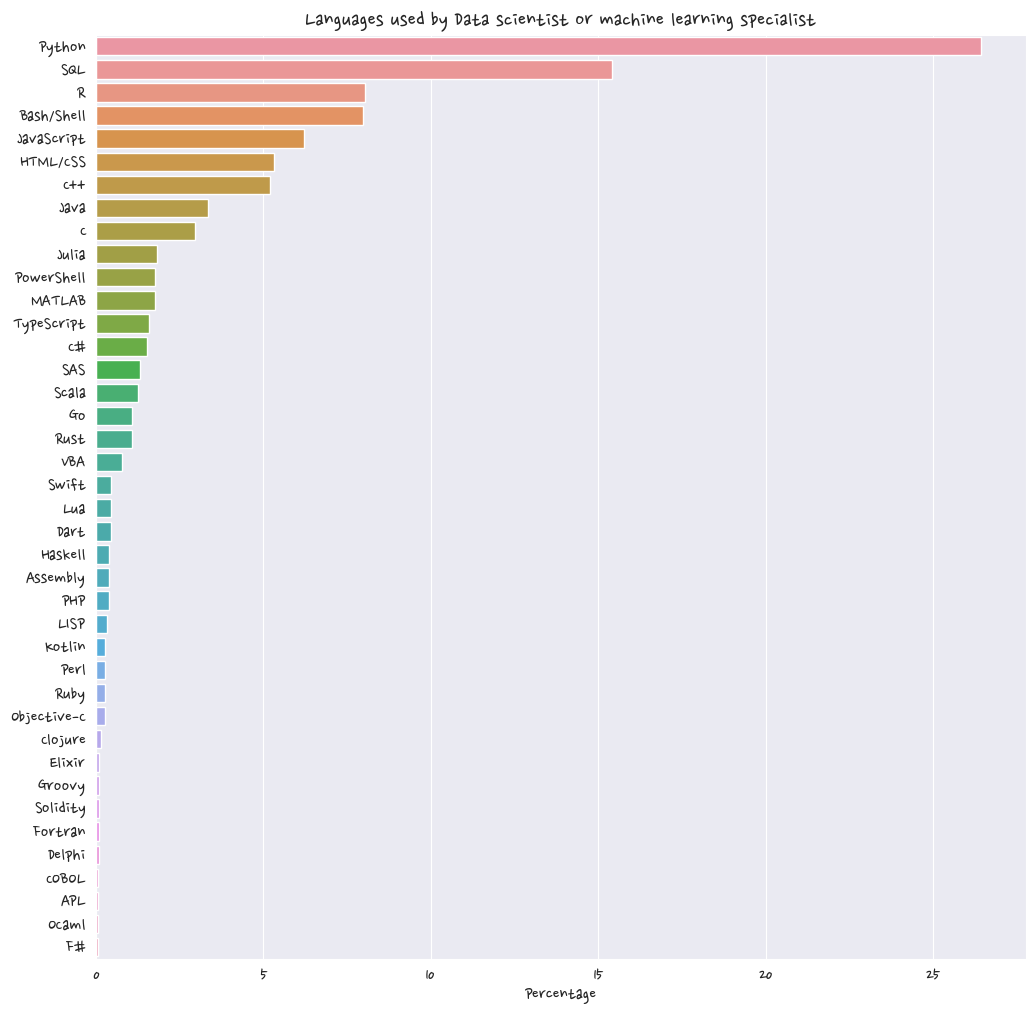

In [368]:
# 데이터 사이언스 관련 분야에서 일하는 응답자들

devtype_dt = survey_df[survey_df.DevType =='Data scientist or machine learning specialist']
devtype_dt

devtype_dt_df = split_multicolumn(devtype_dt['LanguageHaveWorkedWith'])

devtype_dt_totals = devtype_dt_df.sum().sort_values(ascending=False)

devtype_dt_totals_percentages = devtype_dt_totals /  devtype_dt_totals.sum() *100

plt.figure(figsize=(12,12))
plt.title("Languages used by Data scientist or machine learning specialist")
sns.barplot(x=devtype_dt_totals_percentages, y=devtype_dt_totals_percentages.index)
plt.xlabel('Percentage')
    
plt.show()

In [370]:
data_science_folks = survey_df[survey_df.DevType.str.contains('Data scientist or machine learning specialist',na=False)]
data_science_folks

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
3,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14.0,5.0,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,NaN,NaN,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,NaN
42,Israel,18-24 years old,Man,"Secondary school (e.g. American high school, G...",3.0,3.0,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;Python;SQL,Coursera;Udemy;Udacity,NaN,No,"Employed, full-time",Data scientist or machine learning specialist;...,3.0
51,Czech Republic,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11.0,NaN,Bash/Shell;Julia;Python,NaN,NaN,NaN,No,"Employed, full-time;Student, full-time",Data scientist or machine learning specialist;...,4.0
62,Mexico,25-34 years old,Man,Some college/university study without earning ...,2.0,NaN,Bash/Shell;HTML/CSS;Python,Assembly;Dart;Rust;Solidity;SQL,Coursera,NaN,Yes,"Student, part-time;Independent contractor, fre...",Data scientist or machine learning specialist;...,NaN
86,United States of America,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10.0,7.0,Bash/Shell;Java;Python;SQL,Clojure;Dart;Go;Java;JavaScript;Kotlin;Python;...,NaN,Developer portal or other central places to fi...,No,"Employed, full-time",Data scientist or machine learning specialist;...,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73197,Netherlands,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10.0,0.0,Bash/Shell;PowerShell;Python;SQL,Bash/Shell;Python;Rust;SQL,Coursera;Udemy;Codecademy,Developer portal or other central places to fi...,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,NaN
73230,United States of America,45-54 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",18.0,15.0,Bash/Shell;C++;PowerShell;Python;SQL,C++;Python,NaN,None of these,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,15.0
73235,Thailand,25-34 years old,Man,NaN,3.0,4.0,Assembly;Bash/Shell;JavaScript;PHP;Python;R;SA...,APL;C;C#;C++,Coursera;Udemy;edX;Skillsoft,DevOps function,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,20.0


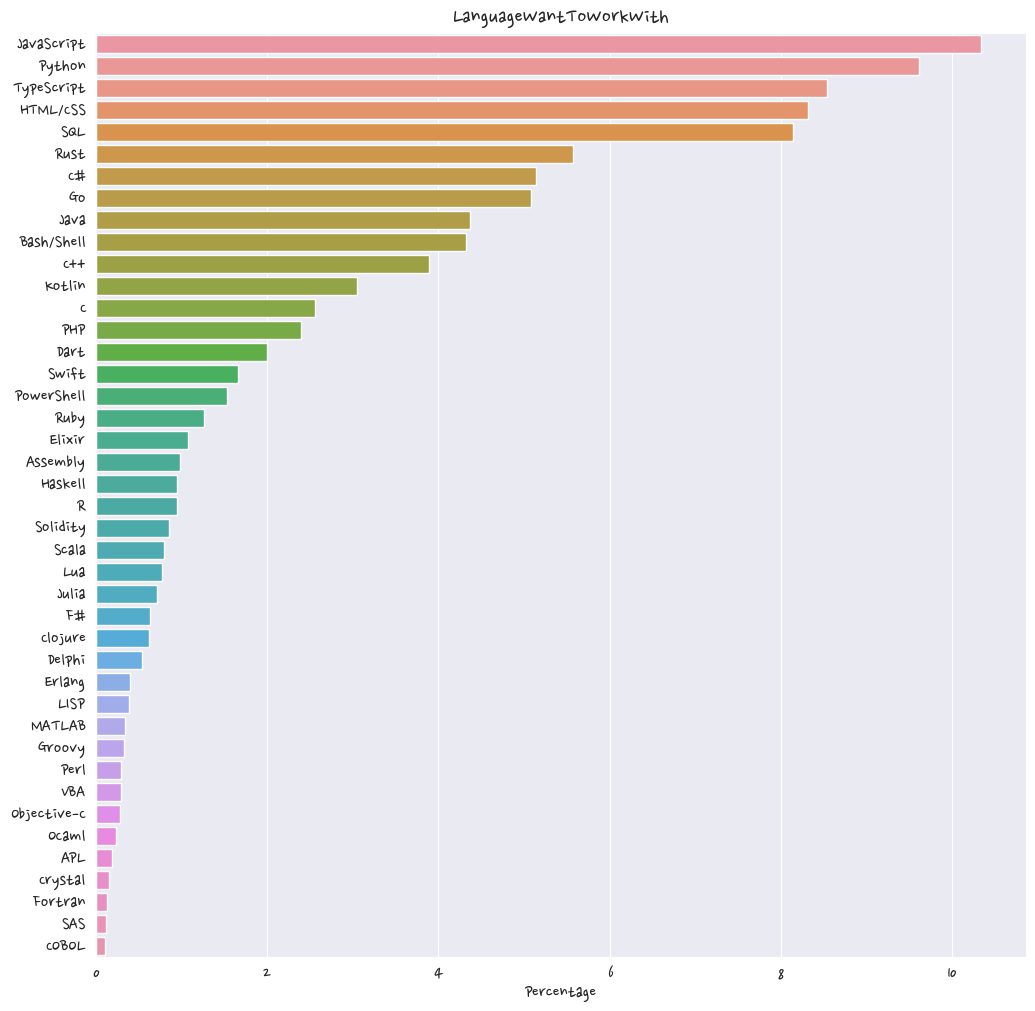

In [373]:
#내년에 가장 많은 사람들이 배우고 싶어하는 언어
survey_df.LanguageWantToWorkWith


languagewant_dt_df = split_multicolumn(survey_df['LanguageWantToWorkWith'])

languagewant_dt_totals = languagewant_dt_df.sum().sort_values(ascending=False)

languagewant_dt_totals_percentages = languagewant_dt_totals /  languagewant_dt_totals.sum() *100

plt.figure(figsize=(12,12))
plt.title("LanguageWantToWorkWith")
sns.barplot(x=languagewant_dt_totals_percentages, y=languagewant_dt_totals_percentages.index)
plt.xlabel('Percentage')
    
plt.show()

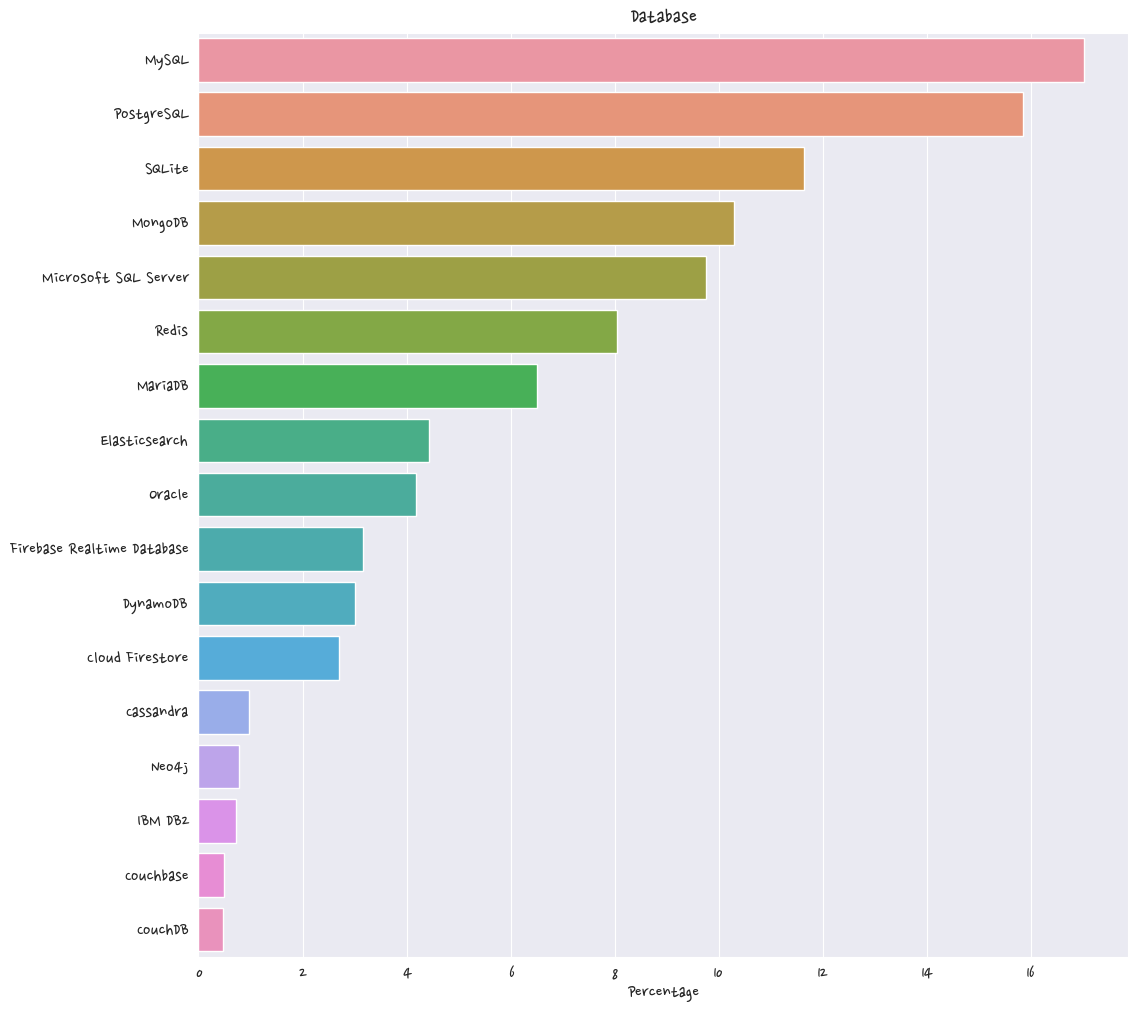

In [378]:
#데이터베이스에서 가장 많이 사용되는 언어

database_dt_df = split_multicolumn(survey_raw_df['DatabaseHaveWorkedWith'])

database_dt_totals = database_dt_df.sum().sort_values(ascending=False)

database_dt_totals_percentages = database_dt_totals /  database_dt_totals.sum() *100

plt.figure(figsize=(12,12))
plt.title("Database")
sns.barplot(x=database_dt_totals_percentages, y=database_dt_totals_percentages.index)
plt.xlabel('Percentage')
    
plt.show()

In [377]:
survey_raw_df.DatabaseHaveWorkedWith

ResponseId
1                                                      NaN
2                                                      NaN
3                                     Microsoft SQL Server
4                                     Microsoft SQL Server
5        Cloud Firestore;Elasticsearch;Microsoft SQL Se...
                               ...                        
73264                 Elasticsearch;MySQL;PostgreSQL;Redis
73265                  Elasticsearch;MongoDB;Oracle;SQLite
73266    MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...
73267                  Microsoft SQL Server;MongoDB;Oracle
73268                     Microsoft SQL Server;Neo4j;Redis
Name: DatabaseHaveWorkedWith, Length: 73268, dtype: object